In [0]:
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam




Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
wine_data_set = pd.read_csv("/content/drive/My Drive/DNN/WINE/winequality-red.csv",sep=";",header=0)

In [0]:
#説明変数(ワインに含まれる成分)
x = DataFrame(wine_data_set.drop("quality", axis=1))

#目的変数(各ワインの品質を10段階評価したもの)
y = DataFrame(wine_data_set["quality"])

#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)


#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                384       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [0]:
#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=5000,verbose=1,validation_data=(x_test, y_test))


Train on 1519 samples, validate on 80 samples
Epoch 1/5000
1519/1519 [==============================] - 0s 321us/step - loss: 0.0848 - acc: 0.3713 - val_loss: 0.0830 - val_acc: 0.3375
Epoch 2/5000
1519/1519 [==============================] - 0s 38us/step - loss: 0.0763 - acc: 0.4246 - val_loss: 0.0690 - val_acc: 0.4500
Epoch 3/5000
1519/1519 [==============================] - 0s 37us/step - loss: 0.0725 - acc: 0.4398 - val_loss: 0.0693 - val_acc: 0.4500
Epoch 4/5000
1519/1519 [==============================] - 0s 40us/step - loss: 0.0701 - acc: 0.4411 - val_loss: 0.0720 - val_acc: 0.3375
Epoch 5/5000
1519/1519 [==============================] - 0s 35us/step - loss: 0.0689 - acc: 0.4496 - val_loss: 0.0688 - val_acc: 0.4500
Epoch 6/5000
1519/1519 [==============================] - 0s 34us/step - loss: 0.0671 - acc: 0.4503 - val_loss: 0.0685 - val_acc: 0.4125
Epoch 7/5000
1519/1519 [==============================] - 0s 35us/step - loss: 0.0665 - acc: 0.4332 - val_loss: 0.0686 - val_acc: 0

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")


80/80 [==============================] - 0s 169us/step


Test loss: 0.05605879500508308
Test accuracy: 0.625


--サンプルワインのデータ--
[7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]


--予測値--
[6]




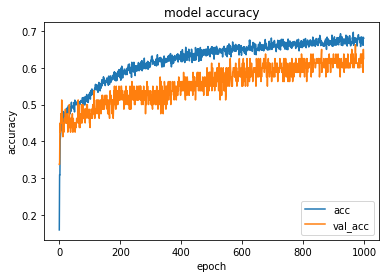

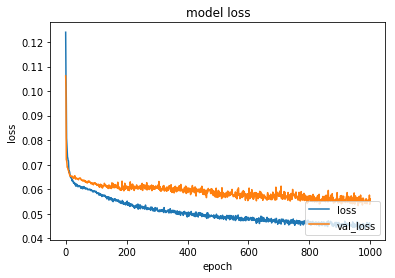

In [0]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")


80/80 [==============================] - 0s 241us/step


Test loss: 0.05702231228351593
Test accuracy: 0.6125


--サンプルワインのデータ--
[7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]


--予測値--
[6]




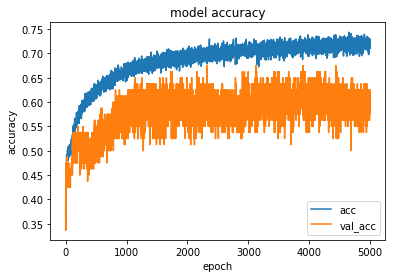

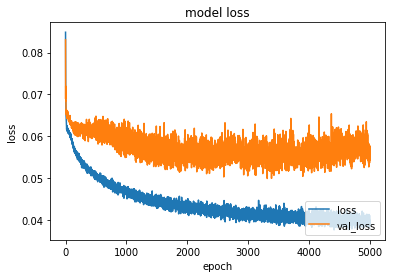

In [0]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

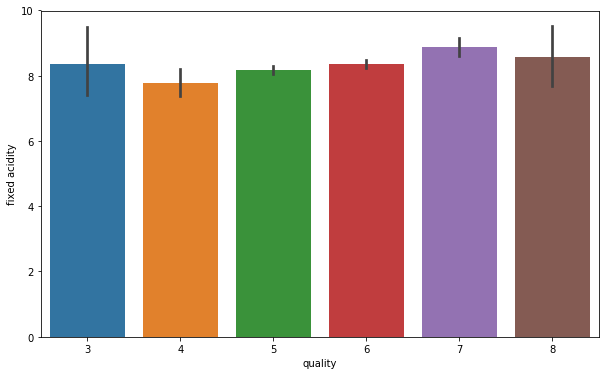

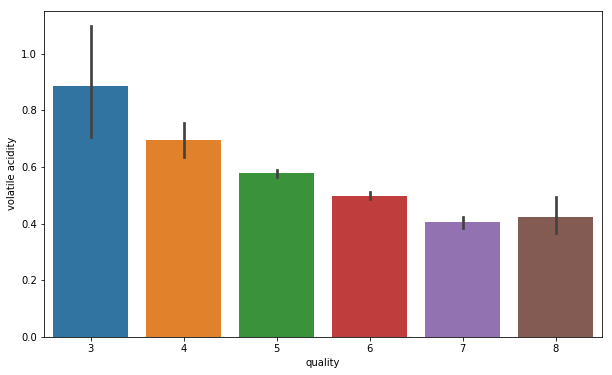

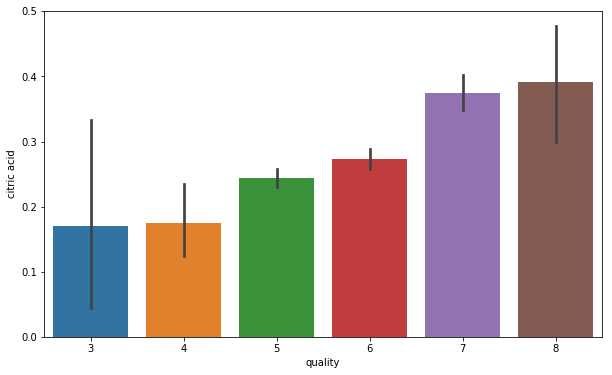

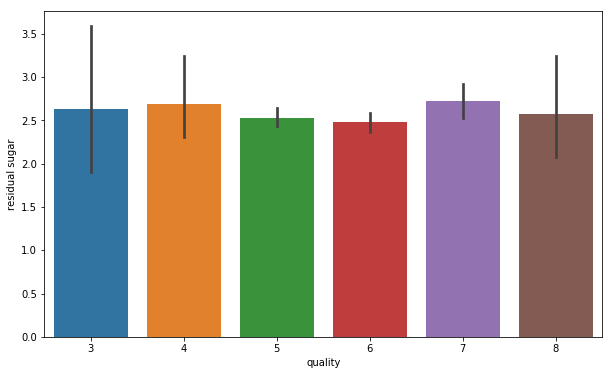

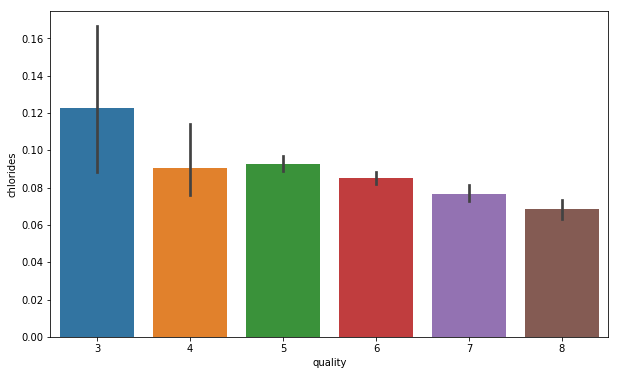

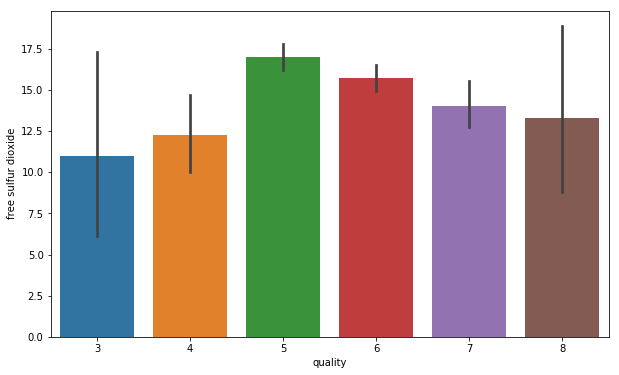

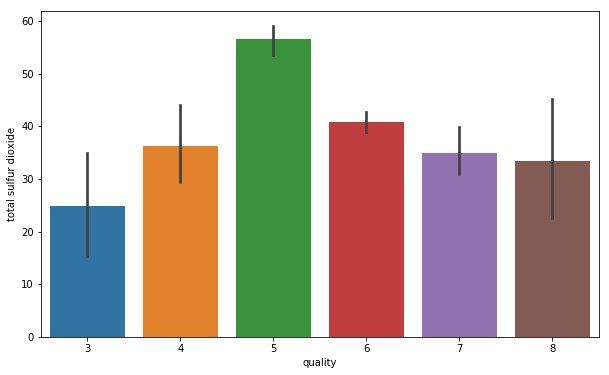

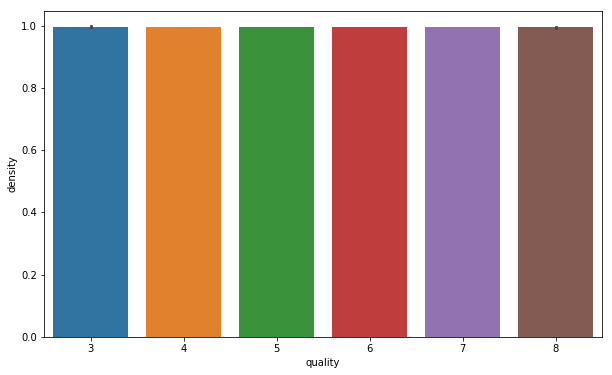

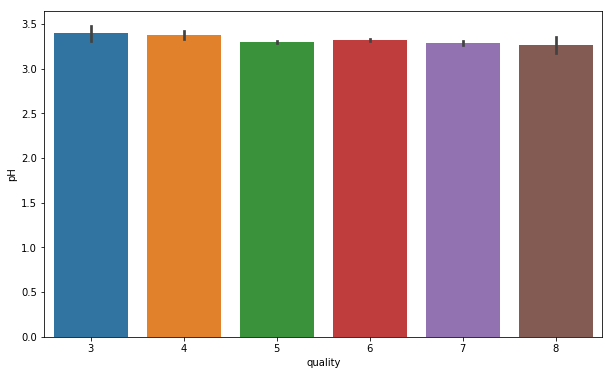

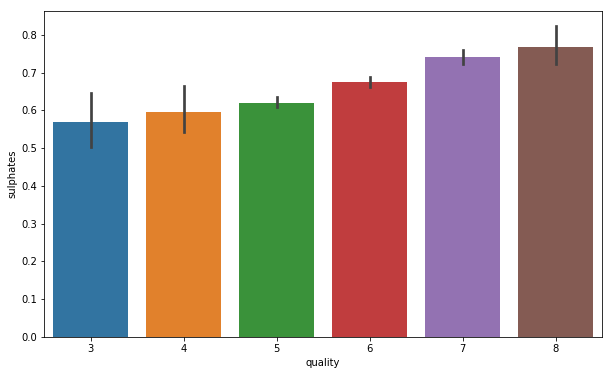

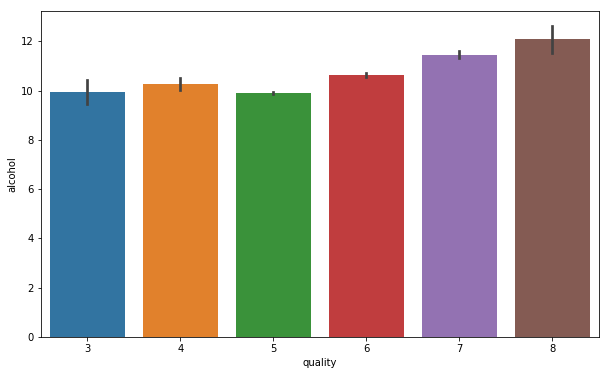

In [0]:
import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data_set)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data_set)

In [0]:
wine_data_set = pd.read_csv("/content/drive/My Drive/DNN/WINE/winequality-red2.csv",header=0)

In [0]:
#説明変数(ワインに含まれる成分)
x = DataFrame(wine_data_set.drop("quality", axis=1))

#目的変数(各ワインの品質を10段階評価したもの)
y = DataFrame(wine_data_set["quality"])

#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)


#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                256       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)               

In [0]:
#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=2000,verbose=1,validation_data=(x_test, y_test))


Train on 1519 samples, validate on 80 samples
Epoch 1/2000
1519/1519 [==============================] - 1s 360us/step - loss: 0.1108 - acc: 0.3430 - val_loss: 0.0939 - val_acc: 0.4875
Epoch 2/2000
1519/1519 [==============================] - 0s 28us/step - loss: 0.1030 - acc: 0.3818 - val_loss: 0.0965 - val_acc: 0.4875
Epoch 3/2000
1519/1519 [==============================] - 0s 29us/step - loss: 0.1029 - acc: 0.3943 - val_loss: 0.0878 - val_acc: 0.5000
Epoch 4/2000
1519/1519 [==============================] - 0s 31us/step - loss: 0.0972 - acc: 0.4121 - val_loss: 0.0731 - val_acc: 0.4125
Epoch 5/2000
1519/1519 [==============================] - 0s 30us/step - loss: 0.0930 - acc: 0.4154 - val_loss: 0.0734 - val_acc: 0.4875
Epoch 6/2000
1519/1519 [==============================] - 0s 30us/step - loss: 0.0910 - acc: 0.4095 - val_loss: 0.0697 - val_acc: 0.4625
Epoch 7/2000
1519/1519 [==============================] - 0s 28us/step - loss: 0.0863 - acc: 0.4082 - val_loss: 0.0652 - val_acc: 0

80/80 [==============================] - 0s 156us/step


Test loss: 0.05675907880067825
Test accuracy: 0.5875


--サンプルワインのデータ--
[0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]


--予測値--
[6]




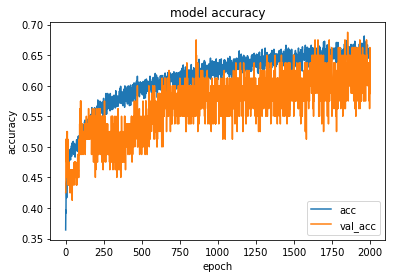

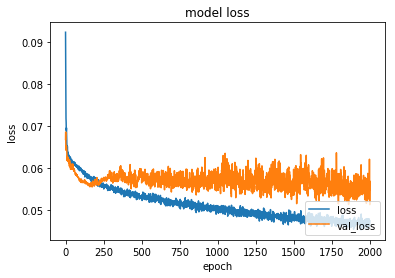

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)



In [0]:
x.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4


80/80 [==============================] - 0s 137us/step


Test loss: 0.05414656698703766
Test accuracy: 0.625


--サンプルワインのデータ--
[0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]


--予測値--
[7]




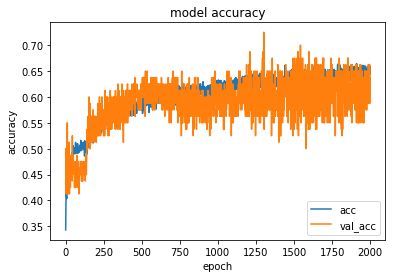

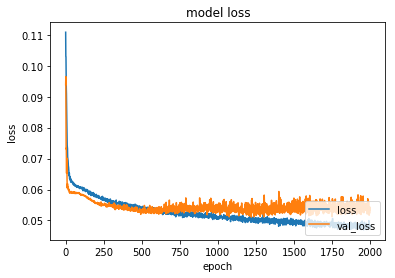

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)



In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=2000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 14)                112       
_________________________________________________________________
dense_28 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_29 (Dense)             (None, 14)                210       
_________________________________________________________________
dropout_22 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                150       
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________
Train on 1519 samples, validate on 80 samples
Epoch 1/2000
1519/1519 [==============================] - 1s 359us/step - lo

80/80 [==============================] - 0s 151us/step


Test loss: 0.05407015532255173
Test accuracy: 0.625


--サンプルワインのデータ--
[0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]


--予測値--
[7]




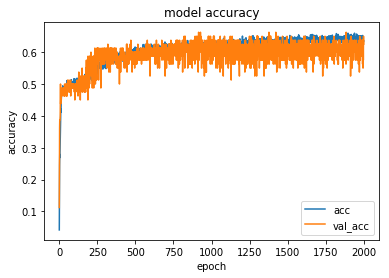

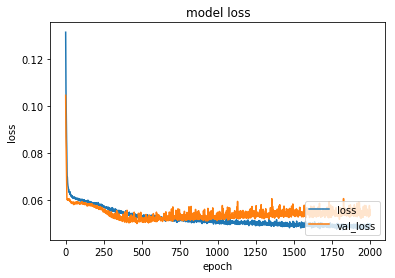

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              8192      
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                10250     
Total params: 18,442
Trainable params: 18,442
Non-trainable params: 0
_________________________________________________________________
Train on 1519 samples, validate on 80 samples
Epoch 1/2000
1519/1519 [==============================] - 1s 365us/step - loss: 0.1016 - acc: 0.3265 - val_loss: 0.0776 - val_acc: 0.4625
Epoch 2/2000
1519/1519 [==============================] - 0s 33us/step - loss: 0.0813 - acc: 0.4332 - val_loss: 0.0726 - val_acc: 0.5000
Epoch 3/2000
1519/1519 [==============================] - 0

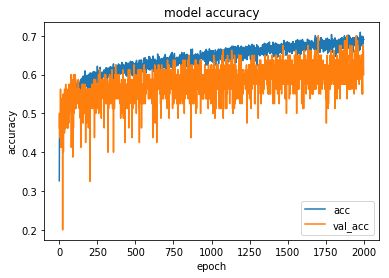

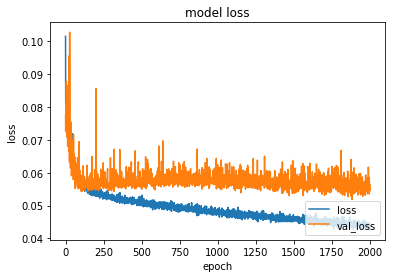

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(7,)))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=2000,verbose=1,validation_data=(x_test, y_test))

score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [0.35, 0.46, 0.078, 15, 37, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(7,)))
model.add(Dense(256, activation='relu', input_shape=(7,)))
model.add(Dense(256, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=2000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)               

80/80 [==============================] - 0s 125us/step


Test loss: 0.06641384065151215
Test accuracy: 0.6


--サンプルワインのデータ--
[1, 1, 0.078, 20, 37, 1, 12.8]


--予測値--
[6]




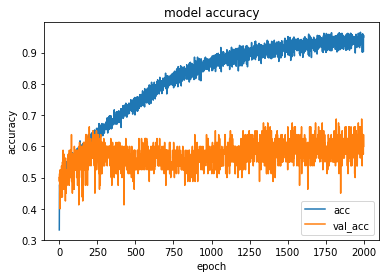

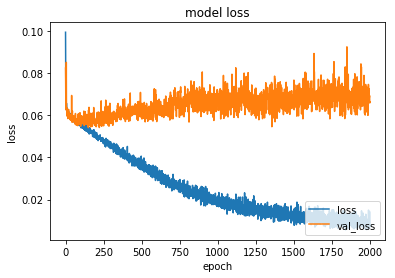

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [1, 1, 0.078, 20, 37, 1, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(224, activation='relu', input_shape=(7,)))
model.add(Dense(224, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(112, activation='relu', input_shape=(7,)))
model.add(Dense(112, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(56, activation='relu', input_shape=(7,)))
model.add(Dense(56, activation='relu', input_shape=(7,)))
model.add(Dense(56, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(28, activation='relu', input_shape=(7,)))
model.add(Dense(28, activation='relu', input_shape=(7,)))
model.add(Dense(28, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(4096, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(4096, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(1000, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=2000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 224)               1792      
_________________________________________________________________
dense_72 (Dense)             (None, 224)               50400     
_________________________________________________________________
dropout_40 (Dropout)         (None, 224)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 112)               25200     
_________________________________________________________________
dense_74 (Dense)             (None, 112)               12656     
_________________________________________________________________
dropout_41 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 56)              

80/80 [==============================] - 0s 330us/step


Test loss: 0.05494692474603653
Test accuracy: 0.65


--サンプルワインのデータ--
[1, 1, 0.078, 20, 37, 1, 12.8]


--予測値--
[6]




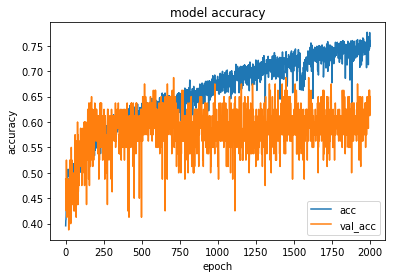

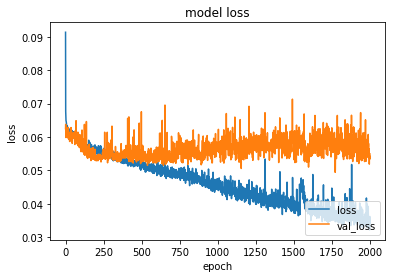

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [1, 1, 0.078, 20, 37, 1, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
def category_volacid(x):
    if x < 0.2:
        return 0
    elif x < 0.4:
        return 1
    elif x < 0.6:
        return 2
    elif x < 0.8:
        return 3
    elif x < 1.0:
        return 4
    elif x < 1.2:
        return 5
    elif x < 1.4:
        return 6
    else:
        return 7 

x_train['volatile_acidity'] = x_train['volatile acidity'].apply(category_volacid)
x_test['volatile_acidity'] = x_test['volatile acidity'].apply(category_volacid)

In [0]:
def category_citacid(x):
    if x < 0.1:
        return 0
    elif x < 0.2:
        return 1
    elif x < 0.3:
        return 2
    elif x < 0.4:
        return 3
    elif x < 0.5:
        return 4
    elif x < 0.6:
        return 5
    elif x < 0.7:
        return 6
    elif x < 0.8:
        return 7
    elif x < 0.9:
        return 8                      
    else:
        return 9

x_train['citric_acid'] = x_train['citric acid'].apply(category_citacid)
x_test['citric_acid'] = x_test['citric acid'].apply(category_citacid)

def category_chlorides(x):
    if x < 0.05:
        return 0
    elif x < 0.1:
        return 1
    elif x < 0.15:
        return 2
    elif x < 0.2:
        return 3
    elif x < 0.25:
        return 4
    elif x < 0.3:
        return 5
    elif x < 0.35:
        return 6
    elif x < 0.4:
        return 7
    elif x < 0.45:
        return 8  
    elif x < 0.5:
        return 9     
    elif x < 0.55:
        return 10 
    elif x < 0.6:
        return 11
    else:
        return 12

x_train['chlorides_'] = x_train['chlorides'].apply(category_chlorides)
x_test['chlorides_'] = x_test['chlorides'].apply(category_chlorides)

def category_freesul(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

x_train['free_sulfur_dioxide'] = x_train['free sulfur dioxide'].apply(category_freesul)
x_test['free_sulfur_dioxide'] = x_test['free sulfur dioxide'].apply(category_freesul)


In [0]:
x_train.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,volatile_acidity,citric_acid,chlorides_,free_sulfur_dioxide
31,0.685,0.00,2,22.0,37.0,0.57,10.6,3,0,12,2
538,0.350,0.49,1,5.0,35.0,0.66,12.0,1,4,12,0
280,0.260,0.44,1,6.0,19.0,0.82,9.3,1,4,12,0
979,0.450,0.49,1,3.0,6.0,0.63,10.4,2,4,12,0
212,0.440,0.64,1,5.0,15.0,0.67,10.2,2,6,12,0


In [0]:
x_train.drop(['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide'], axis=1, inplace=True)
x_test.drop(['volatile acidity', 'citric acid',  'chlorides', 'free sulfur dioxide'], axis=1, inplace=True)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(30, activation='relu', input_shape=(7,)))
model.add(Dense(20, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 30)                240       
_________________________________________________________________
dense_126 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_127 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_128 (Dense)            (None, 10)                110       
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________
Train on 1519 samples, validate on 80 samples
Epoch 1/1000
1519/1519 [==============================] - 2s 1ms/step - loss: 0.2672 - acc: 0.0783 - val_loss: 0.2324 - val_acc: 0.1000
Epoch 2/1000
1519/1519 [==============================] - 0s 34us/s

80/80 [==============================] - 0s 115us/step


Test loss: 0.08798440396785737
Test accuracy: 0.3875


--サンプルワインのデータ--
[1, 1, 0.078, 20, 37, 1, 12.8]


--予測値--
[6]




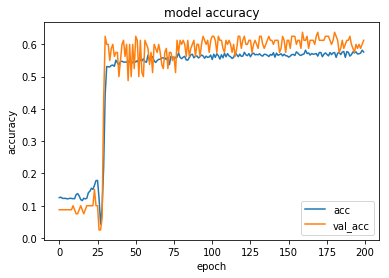

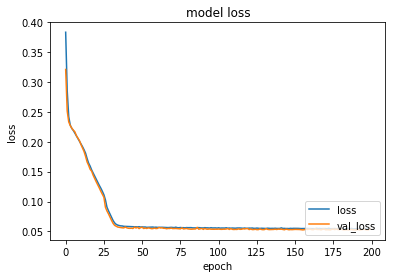

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [1, 1, 0.078, 20, 37, 1, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
wine_data_set = pd.read_csv("/content/drive/My Drive/DNN/WINE/winequality-white2.csv",header=0)

In [0]:
#説明変数(ワインに含まれる成分)
x = DataFrame(wine_data_set.drop("quality", axis=1))

#目的変数(各ワインの品質を10段階評価したもの)
y = DataFrame(wine_data_set["quality"])

#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)


#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 256)               3072      
_________________________________________________________________
dropout_81 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_82 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_83 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 10)              

245/245 [==============================] - 0s 96us/step


Test loss: 2.2931868280683245
Test accuracy: 0.0


--サンプルワインのデータ--
[7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]


--予測値--
[8]




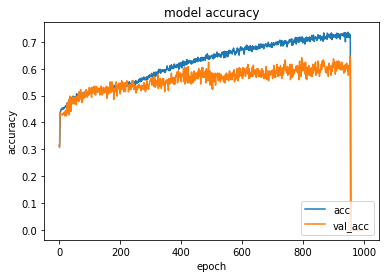

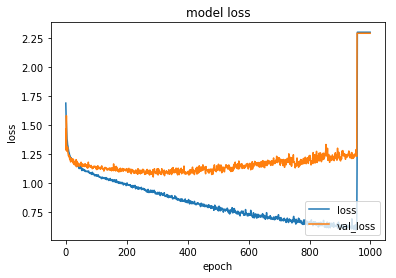

In [0]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [7.9, 0.35, 0.46, 5, 0.078, 15, 37, 0.9973, 3.35, 0.86, 12.8]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(), metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 256)               3072      
_________________________________________________________________
dense_162 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_163 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_164 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_165 (Dense)            (None, 10)                2570      
Total params: 203,018
Trainable params: 203,018
Non-trainable params: 0
_________________________________________________________________
Train on 4653 samples, validate on 245 samples
Epoch 1/1000
4653/4653 [==============================] - 3s 670us

KeyboardInterrupt: ignored

In [0]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_shape=(11,)))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-06), metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 256)               3072      
_________________________________________________________________
dense_182 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_183 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_90 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_185 (Dense)            (None, 10)                2570      
Total params: 203,018
Trainable params: 203,018
Non-trainable params: 0
_______________________________________________